# Agglomerative Clustering

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

Silahkan download datanya disini https://drive.google.com/file/d/1-OIjQyPh3eYzmnyPp17FwQEkusoFCYzX/view?usp=sharing

Disini kita akan membuat customer segmentation dari data customer sebuah toko kredit di Mall

In [4]:
data = pd.read_csv('Mall_Customers.csv', index_col='CustomerID')
data

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


Untuk saat ini kita pilih data angka saja

In [6]:
#Mengambil data dari dataframe untuk dijadikan vektor
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [7]:
#Karena standar besar/kecil di kedua variabel berbeda, maka kita standarisasi dulu
#penjelasan detail akan dibahas di minggu selanjutnya
X = StandardScaler().fit_transform(X)
X

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

## Tugas 1 :Membuat Dendogram
pilih metode linkage = complete, buat dendogram seperti ini :


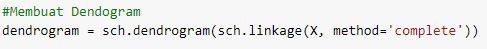

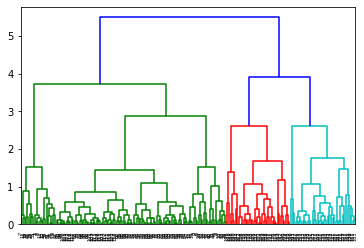

In [8]:
#Membuat Dendogram
dendrogram = sch.dendrogram(sch.linkage(X, method ='complete'))


## Tugas 2 :    Membuat model Agglomerative Clustering

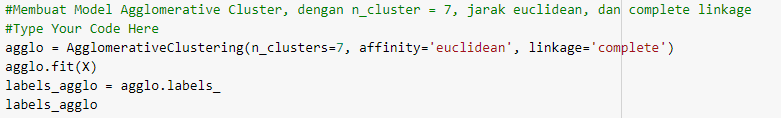

In [9]:
#Membuat Model Agglomerative Cluster, dengan n_cluster = 7, jarak euclidean, dan complete linkage
agglo = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='complete' )
agglo.fit(X)
labels_agglo = agglo.labels_
labels_agglo


array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4,
       1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 5, 6, 5,
       6, 5])

## Tugas 3 :  Visualisasi Hasil Clustering  
Nb :    warna boleh diubah 

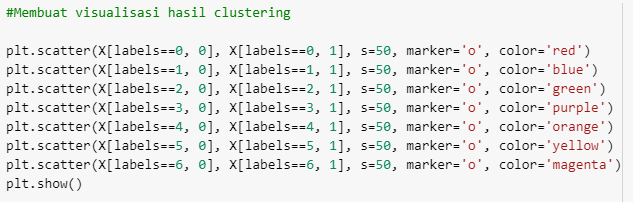


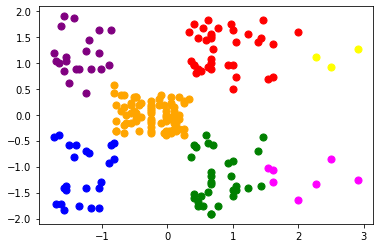

In [10]:
#Membuat visualisasi hasil clustering
plt.scatter(X[labels_agglo==0, 0], X[labels_agglo==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels_agglo==1, 0], X[labels_agglo==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels_agglo==2, 0], X[labels_agglo==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels_agglo==3, 0], X[labels_agglo==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels_agglo==4, 0], X[labels_agglo==4, 1], s=50, marker='o', color='orange')
plt.scatter(X[labels_agglo==5, 0], X[labels_agglo==5, 1], s=50, marker='o', color='yellow')
plt.scatter(X[labels_agglo==6, 0], X[labels_agglo==6, 1], s=50, marker='o', color='magenta')
plt.show()


Kita bisa lihat hasil clusteringnya sudah bagus, terlihat antar cluster cukup terpisah (ga ada misalnya anggota cluster warna biru berada di tengah2 warna oren). Artinya kita bisa menggunakan hasil clustering ini

In [11]:
#Menambahkan hasil clustering ke dataframe
data['cluster_agglo'] = labels_agglo
data

,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_agglo
CustomerID,,,,,
1,Male,19,15,39,1
2,Male,21,15,81,3
3,Female,20,16,6,1
4,Female,23,16,77,3
5,Female,31,17,40,1
...,...,...,...,...,...
196,Female,35,120,79,5
197,Female,45,126,28,6
198,Male,32,126,74,5


## Tugas 4 :    Cari rata-rata per cluster

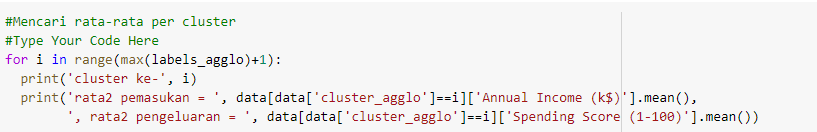

In [12]:
#Mencari rata-rata per cluster
for i in range(max(labels_agglo)+1):
  print('cluster ke-', i)
  print('rata rata pemasukan =', data[data['cluster_agglo']==i]['Annual Income (k$)'].mean(),
        ', rata rata pengeluaran = ', data[data['cluster_agglo']==i]['Spending Score (1-100)'].mean())

cluster ke- 0
rata rata pemasukan = 83.11111111111111 , rata rata pengeluaran =  82.41666666666667
cluster ke- 1
rata rata pemasukan = 26.304347826086957 , rata rata pengeluaran =  20.91304347826087
cluster ke- 2
rata rata pemasukan = 80.74193548387096 , rata rata pengeluaran =  18.516129032258064
cluster ke- 3
rata rata pemasukan = 25.095238095238095 , rata rata pengeluaran =  80.04761904761905
cluster ke- 4
rata rata pemasukan = 54.41772151898734 , rata rata pengeluaran =  50.21518987341772
cluster ke- 5
rata rata pemasukan = 127.66666666666667 , rata rata pengeluaran =  78.66666666666667
cluster ke- 6
rata rata pemasukan = 114.71428571428571 , rata rata pengeluaran =  19.142857142857142


Sehingga, bisa kita simpulkan bahwa :    
*   Cluster 0 adalah kelompok keuangan menengah ke-atas, baik secara pemasukan maupun pengeluaran
*   Cluster 1 adalah kelompok keuangan rendah bawah, baik secara pemasukan maupun pengeluaran
*   Cluster 2 adalah kelompok yang baik dalam menabung, pemasukannya lumayan namun pengeluarannya sangat rendah
*   Cluster 3 adalah kelompok yang boros, pemasukannya rendah namun pengeluarannya cukup besar
*   Cluster 4 adalah kelompok menengah ke-bawah, baik secara pemasukan maupun pengeluaran
*   Cluster 5 adalah kelompok yang kaya, namun pengeluarannya juga lumayan
*   Cluster 6 adalah kelompok yang kaya dan hemat, pengeluarannya sangat kecil

Jika kamu adalah pemilik toko kredit dan akan menawarkan kredit mobil, cluster manakah yang menurutmu tepat? (open discussion)



## Tugas 5 (berkelompok)

Coba buat dendogram, model clustering, visualisasi hasil clustering, dan rata-rata per cluster, tapi dengan ketentuan :    

1.   Kelompok 1 : method/linkage='complete', affinity='manhattan' (jaraknya manhattan)
2. Kelompok 2 : method/linkage='single', affinity='euclidean' (jaraknya euclidean)
3. Kelompok 3 : method/linkage='average', affinity='euclidean' (jaraknya euclidean)
4. Kelompok 4 : method/linkage='single', affinity='manhattan' (jaraknya manhattan)
5. Kelompok 5 : method/linkage='average', affinity='manhattan' (jaraknya manhattan)

Untuk n_cluster, coba disesuaikan dari melihat dendogram, tentukan berapa n_cluster yang menurutmu paling tepat. Bagaimana hasil clusteringmu dengan linkage dan jarak yang ditentukan diatas? Apakah menurutmu cukup bagus untuk data ini? (tidak ada salah/benar, yang penting paham)



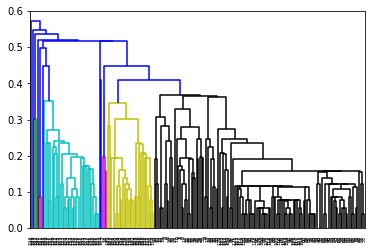

In [13]:
dendrogram = sch.dendrogram(sch.linkage(X, method ='single'))



In [14]:
agglo = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='single' )
agglo.fit(X)
labels_agglo = agglo.labels_
labels_agglo

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 6, 0, 6, 1, 4, 1,
       3, 5])

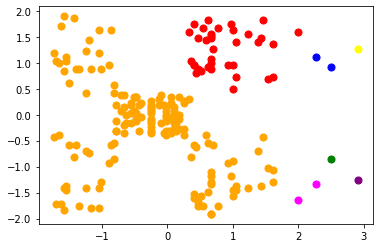

In [15]:
plt.scatter(X[labels_agglo==0, 0], X[labels_agglo==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels_agglo==1, 0], X[labels_agglo==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels_agglo==2, 0], X[labels_agglo==2, 1], s=50, marker='o', color='orange')
plt.scatter(X[labels_agglo==3, 0], X[labels_agglo==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels_agglo==4, 0], X[labels_agglo==4, 1], s=50, marker='o', color='green')
plt.scatter(X[labels_agglo==5, 0], X[labels_agglo==5, 1], s=50, marker='o', color='yellow')
plt.scatter(X[labels_agglo==6, 0], X[labels_agglo==6, 1], s=50, marker='o', color='magenta')
plt.show()


In [16]:
#Mencari rata-rata per cluster
for i in range(max(labels_agglo)+1):
  print('cluster ke-', i)
  print('rata rata pemasukan =', data[data['cluster_agglo']==i]['Annual Income (k$)'].mean(),
        ', rata rata pengeluaran = ', data[data['cluster_agglo']==i]['Spending Score (1-100)'].mean())

cluster ke- 0
rata rata pemasukan = 83.11111111111111 , rata rata pengeluaran =  82.41666666666667
cluster ke- 1
rata rata pemasukan = 26.304347826086957 , rata rata pengeluaran =  20.91304347826087
cluster ke- 2
rata rata pemasukan = 80.74193548387096 , rata rata pengeluaran =  18.516129032258064
cluster ke- 3
rata rata pemasukan = 25.095238095238095 , rata rata pengeluaran =  80.04761904761905
cluster ke- 4
rata rata pemasukan = 54.41772151898734 , rata rata pengeluaran =  50.21518987341772
cluster ke- 5
rata rata pemasukan = 127.66666666666667 , rata rata pengeluaran =  78.66666666666667
cluster ke- 6
rata rata pemasukan = 114.71428571428571 , rata rata pengeluaran =  19.142857142857142


# K-Means Clustering

In [17]:
!pip install -U yellowbrick

In [18]:
# import libraries
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

## Tugas 1 :  Menggunakan metode elbow untuk menentukan jumlah cluster yang tepat

Buat elbow dengan cara berikut :     

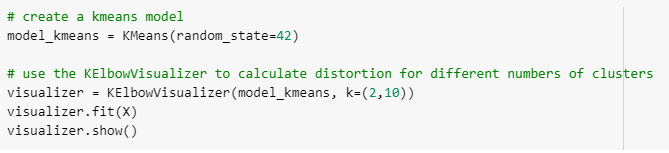

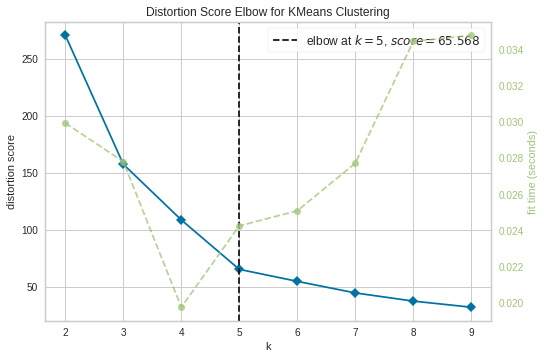

In [19]:
# create a kmeans model
model_kmeans =KMeans(random_state=42)

visualizer =KElbowVisualizer(model_kmeans, k=(2,10))
visualizer.fit(X)
visualizer.show()

Terlihat titik elbow yang tepat ada pada k=5

## Tugas 2 :    Buat model clustering

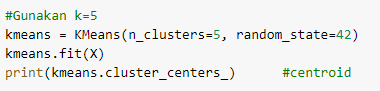

In [20]:
#Gunakan k=5
kmeans =KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
print(kmeans.cluster_centers_)

[[-0.20091257 -0.02645617]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]
 [-1.32954532  1.13217788]
 [ 0.99158305  1.23950275]]


## Tugas 3 :   Visualisasi

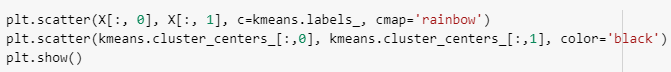

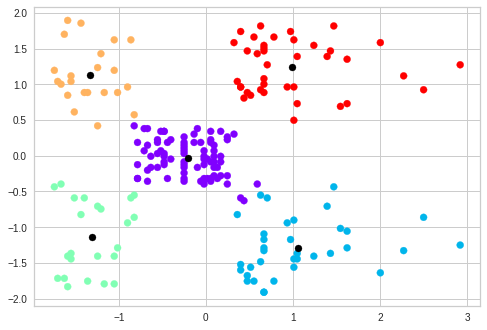

In [21]:
#Type Your Code Here
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], color='black')
plt.show()

Disini terlihat model sudah cukup bagus, mari kita input ke data

In [22]:
label_kmeans = kmeans.labels_
label_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [23]:
data['cluster_kmeans'] = label_kmeans
data

,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_agglo,cluster_kmeans
CustomerID,,,,,,
1,Male,19,15,39,1,2
2,Male,21,15,81,3,3
3,Female,20,16,6,1,2
4,Female,23,16,77,3,3
5,Female,31,17,40,1,2
...,...,...,...,...,...,...
196,Female,35,120,79,5,4
197,Female,45,126,28,6,1
198,Male,32,126,74,5,4


Jika hasil dari kmeans juga bagus, lalu yang manakah yang lebih baik kita gunakan? Agglomerative dengan 7 clusters atau KMeans dengan 5 clusters? Mari kita uji dengan silhouette score. Hasil clustering dengan nilai paling mendekati 1 adalah yang terbaik

## Evaluasi silhouette score

In [24]:
ss_agglo = silhouette_score(X, labels_agglo, metric='euclidean')
ss_kmeans = silhouette_score(X, label_kmeans, metric='euclidean')

print('nilai silhouette score untuk Agglomerative Clustering = ', ss_agglo)
print('nilai silhouette score untuk Kmeans Clustering = ', ss_kmeans)

nilai silhouette score untuk Agglomerative Clustering =  0.2681328893586485
nilai silhouette score untuk Kmeans Clustering =  0.5546571631111091


Ternyata untuk kasus ini clustering dengan K-Means lebih baik

## Tugas 4 (berkelompok):   

1. Hitung silhouette score untuk model agglomerative clustering tiap kelompok, bandingkan dengan kmeans, manakah yang lebih baik?
2. Cari rata-rata income dan pengeluaran per cluster kmeans
3. Buat interpretasinya

In [29]:
ss_agglo = silhouette_score(X, labels_agglo, metric='manhattan')
ss_kmeans = silhouette_score(X, label_kmeans, metric='manhattan')

print('nilai silhouette score untuk Agglomerative Clustering = ', ss_agglo)
print('nilai silhouette score untuk Kmeans Clustering = ', ss_kmeans)

nilai silhouette score untuk Agglomerative Clustering =  0.2681328893586485
nilai silhouette score untuk Kmeans Clustering =  0.5546571631111091


In [30]:
#Mencari rata-rata per cluster
for i in range(max(label_kmeans)+1):
  print('cluster ke-', i)
  print('rata rata pemasukan =', data[data['cluster_kmeans']==i]['Annual Income (k$)'].mean(),
        ', rata rata pengeluaran = ', data[data['cluster_kmeans']==i]['Spending Score (1-100)'].mean())

cluster ke- 0
rata rata pemasukan = 55.2962962962963 , rata rata pengeluaran =  49.51851851851852
cluster ke- 1
rata rata pemasukan = 88.2 , rata rata pengeluaran =  17.114285714285714
cluster ke- 2
rata rata pemasukan = 26.304347826086957 , rata rata pengeluaran =  20.91304347826087
cluster ke- 3
rata rata pemasukan = 25.727272727272727 , rata rata pengeluaran =  79.36363636363636
cluster ke- 4
rata rata pemasukan = 86.53846153846153 , rata rata pengeluaran =  82.12820512820512




> cluster 0 kelompok menengah ke bawah yang hemat

> Cluster 1 adalah kelompok menengah ke atas, pemasukannya lumayan namun pengeluarannya sangat rendah

> Cluster 2 adalah kelompok menegah ke bawah yang hemat, baik secara pemasukan maupun pengeluaran

> cluster ke 3 adalah kelompok menengah ke bawah yang boros, karena pengeluaran lebig besar dari pada pemasukan

> cluster ke 4 adalah kelompok menengah ke atas yang hemat





